# Data Pre-processing

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [91]:
#Data Loading
cancer_df = pd.read_csv("expression_data.csv")
stage_df = pd.read_csv("expression_data_stage.csv")

In [93]:
#Label Trnasfer
cancer_df['group'] = cancer_df['group'].map({"LC": 1, "NC": 0})
stage_df['stage'] = stage_df['stage'].map({"I": 1, "II": 2, "III": 3, "IV": 4,"LI":5, "LT":6, "LN":7, "NN":8})
#split dataset into features and targets
X1 = cancer_df.drop('group', axis=1)
y1 = cancer_df['group']
X2 = stage_df.drop('stage', axis=1)
y2 = stage_df['stage']
# split into train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

# Models

In [95]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistics Regression

##肺癌诊断模型

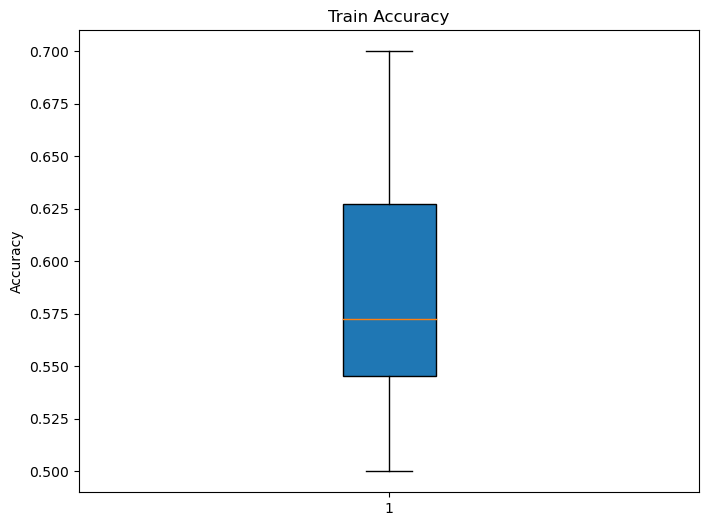

In [98]:
# 验证数据集对模型影响
logistic_regression_model = LogisticRegression()
cv_train_scores = cross_val_score(logistic_regression_model, X1_train, y1_train, cv=10)
# 绘制结果箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(cv_train_scores, patch_artist=True)
plt.title('Train Accuracy')
plt.ylabel('Train')
plt.ylabel('Accuracy')
plt.show()

In [73]:
# 结论：标准差较大，表明逻辑回归模型受训练数据影响较大

In [116]:
# 默认参数训练逻辑回归模型
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X1_train, y1_train)
y_train_pred = logistic_regression_model.predict(X1_train)
y_test_pred = logistic_regression_model.predict(X1_test)
# Performance
conf_matrix = confusion_matrix(y1_test, y_test_pred)
accuracy_train = accuracy_score(y1_train, y_train_pred)
accuracy_test = accuracy_score(y1_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy_train:", accuracy_train)
print("Accuracy_test:", accuracy_test)

Confusion Matrix:
[[ 5 20]
 [ 0 20]]
Accuracy_train: 0.638095238095238
Accuracy_test: 0.5555555555555556


In [117]:
#结论：准确率不够好，优化模型

In [118]:
# 正则优化
# 定义超参数搜索范围
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000,2000], 'penalty': ['l1', 'l2']}
# Cross-Validation
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=10)
grid_search.fit(X1_train,y1_train)
# 输出最佳参数组合
print("Best Parameters:", grid_search.best_params_)
# 获取每个参数组合的结果
results = grid_search.cv_results_
# 打印每个参数组合的准确率
for mean_accuracy, params in zip(results['mean_test_score'], results['params']):
    print("Params:", params, "Mean accuracy:", mean_accuracy)

C:\Users\Gina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best Parameters: {'C': 100, 'penalty': 'l2'}
Params: {'C': 0.001, 'penalty': 'l1'} Mean accuracy: nan
Params: {'C': 0.001, 'penalty': 'l2'} Mean accuracy: 0.5527272727272727
Params: {'C': 0.01, 'penalty': 'l1'} Mean accuracy: nan
Params: {'C': 0.01, 'penalty': 'l2'} Mean accuracy: 0.5527272727272727
Params: {'C': 0.1, 'penalty': 'l1'} Mean accuracy: nan
Params: {'C': 0.1, 'penalty': 'l2'} Mean accuracy: 0.5527272727272727
Params: {'C': 1, 'penalty': 'l1'} Mean accuracy: nan
Params: {'C': 1, 'penalty': 'l2'} Mean accuracy: 0.5809090909090908
Params: {'C': 10, 'penalty': 'l1'} Mean accuracy: nan
Params: {'C': 10, 'penalty': 'l2'} Mean accuracy: 0.8163636363636364
Params: {'C': 100, 'penalty': 'l1'} Mean accuracy: nan
Params: {'C': 100, 'penalty': 'l2'} Mean accuracy: 0.8936363636363638
Params: {'C': 1000, 'penalty': 'l1'} Mean accuracy: nan
Params: {'C': 1000, 'penalty': 'l2'} Mean accuracy: 0.8645454545454545
Params: {'C': 2000, 'penalty': 'l1'} Mean accuracy: nan
Params: {'C': 2000, 'p

C:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Gina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueEr

In [119]:
# 优化后用最佳最终参数建模
logistic_regression_l2 = LogisticRegression(C=100,penalty = 'l2')
logistic_regression_l2.fit(X1_train, y1_train)

print("Coefficients:", logistic_regression_l2.coef_)
print("Intercept:", logistic_regression_l2.intercept_)

y_train_pred_l2 = logistic_regression_l2.predict(X1_train)
y_test_pred_l2 = logistic_regression_l2.predict(X1_test)

Coefficients: [[ 25.38074817   3.88301994 -17.93282864 -13.30456703 -12.69023272]]
Intercept: [220.6867693]


C:\Users\Gina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix_l2:
[[17  8]
 [ 0 20]]
Accuracy_train_l2: 0.8952380952380953
Accuracy_test_l2: 0.8222222222222222


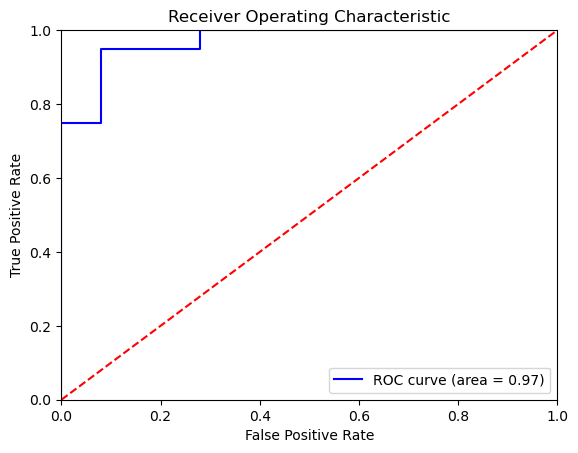

In [120]:
#评估模型性能
conf_matrix_l2 = confusion_matrix(y1_test, y_test_pred_l2)
accuracy_train_l2 = accuracy_score(y1_train, y_train_pred_l2)
accuracy_test_l2 = accuracy_score(y1_test, y_test_pred_l2)
print("Confusion Matrix_l2:")
print(conf_matrix_l2)
print("Accuracy_train_l2:", accuracy_train_l2)
print("Accuracy_test_l2:", accuracy_test_l2)

# ROC曲线
y_scores_l2 = logistic_regression_l2.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = roc_curve(y1_test, y_scores_l2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

逻辑回归模型公式: Logit(p) = 220.687 + (25.381) * 3 + (3.883) * 11 + (-17.933) * 27 + (-13.305) * 26 + (-12.690) * 25 

重要特征分析:
  Feature  Coefficient  Absolute Coefficient
0       3    25.380748             25.380748
2      27   -17.932829             17.932829
3      26   -13.304567             13.304567
4      25   -12.690233             12.690233
1      11     3.883020              3.883020


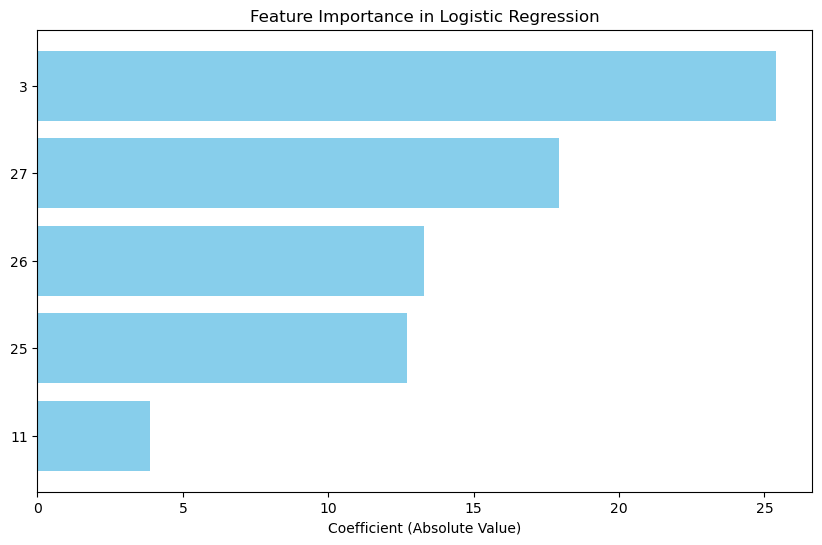

In [132]:
coefficients = logistic_regression_l2.coef_[0]
intercept = logistic_regression_l2.intercept_[0]
feature_names = X1.columns if hasattr(X1, 'columns') else [f'feature_{i}' for i in range(X1.shape[1])]
formula = f"Logit(p) = {intercept:.3f} "
for coef, name in zip(coefficients, feature_names):
    formula += f"+ ({coef:.3f}) * {name} "
print("逻辑回归模型公式:", formula)

# 创建系数数据框
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# 按绝对系数大小排序，分析重要特征
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print("\n重要特征分析:")
print(coef_df)

# 可视化系数大小
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Absolute Coefficient'], color='skyblue')
plt.xlabel("Coefficient (Absolute Value)")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

##肺癌诊断模型

# Decision Tree

##肺癌诊断模型

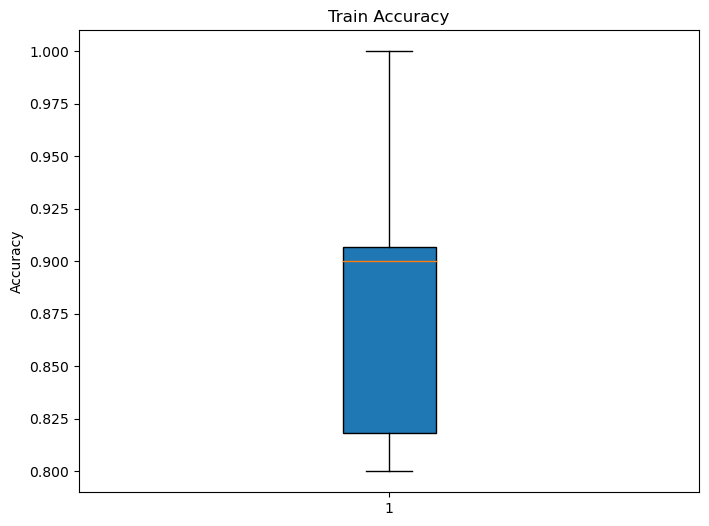

In [102]:
#验证数据集对模型影响
dt_classifier1 = DecisionTreeClassifier()
cv_train_scores1 = cross_val_score(dt_classifier1, X1_train, y1_train, cv=10)
# 绘制箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(cv_train_scores1, patch_artist=True)
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.show()

accuracy_dt_test : 0.8888888888888888


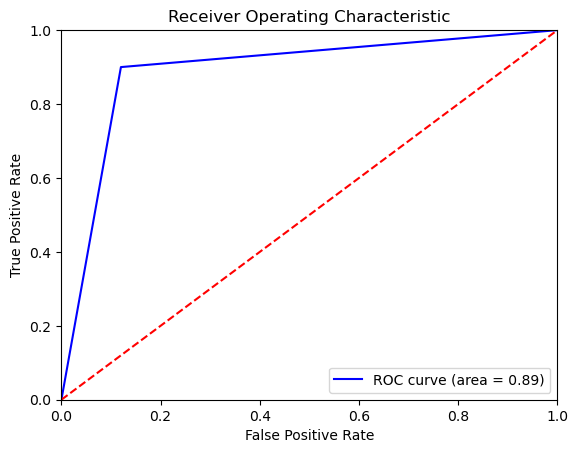

In [105]:
# 评估模型性能
dt_classifier1.fit(X1_train, y1_train)
y1_test_pred_dt = dt_classifier1.predict(X1_test)
accuracy_dt_test1 = accuracy_score(y1_test, y1_test_pred_dt)
print("accuracy_dt_test :", accuracy_dt_test1)

# ROC曲线
y1_scores_dt = dt_classifier1.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = roc_curve(y1_test, y1_scores_dt)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

##分期诊断模型

C:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


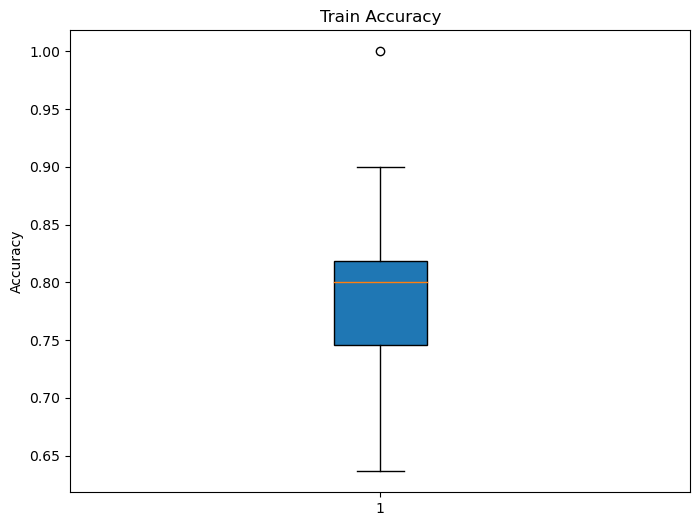

In [121]:
#验证数据集对模型影响
dt_classifier2 = DecisionTreeClassifier()
cv_train_scores2 = cross_val_score(dt_classifier2, X2_train, y2_train, cv=10)
# 绘制箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(cv_train_scores2, patch_artist=True)
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [122]:
# 评估模型性能：Accuracy
dt_classifier2.fit(X2_train, y2_train)
y2_test_pred_dt = dt_classifier2.predict(X2_test)
accuracy_dt_test2 = accuracy_score(y2_test, y2_test_pred_dt)
print("accuracy_dt_test :", accuracy_dt_test2)

accuracy_dt_test : 0.7333333333333333


# Random Forest

##肺癌诊断模型

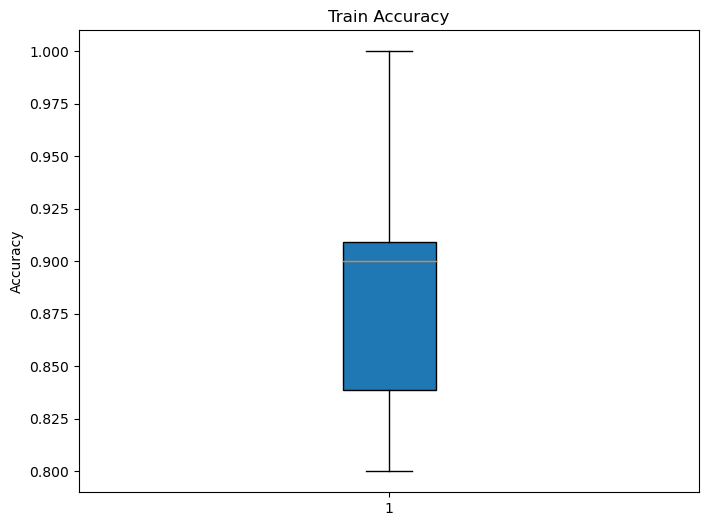

In [123]:
# Define base estimator (Random Forest)
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)
cv_train_scores1 = cross_val_score(rf_classifier1, X1_train, y1_train, cv=10)
# 绘制箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(cv_train_scores, patch_artist=True)
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [111]:
#找模型最优超参数
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [10,100,1000,10000]
}

# Cross-Validation
grid_search = GridSearchCV(rf_classifier1, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X1_train, y1_train)

# Best Parameters and Best Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_estimators': 100}
Best Score: 0.9238095238095237


Accuracy_test_rf: 0.9333333333333333


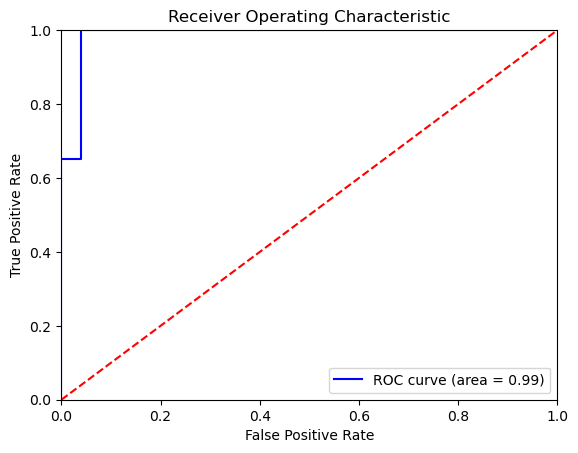

In [124]:
#找到最优参数后计算模型性能
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier1.fit(X1_train, y1_train)
y1_test_pred_rf = rf_classifier1.predict(X1_test)
accuracy_test_rf1 = accuracy_score(y1_test, y1_test_pred_rf)
print("Accuracy_test_rf:", accuracy_test_rf1)

# ROC曲线
y1_scores_rf = rf_classifier1.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = roc_curve(y1_test, y1_scores_rf)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

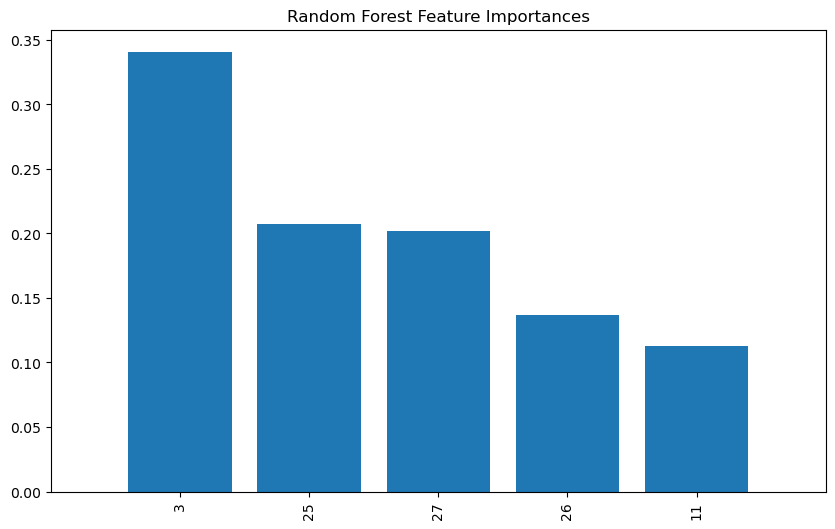

In [131]:
def plot_feature_importances(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} Feature Importances")
    plt.bar(range(X1_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X1_train.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X1_train.shape[1]])
    plt.show()

# 绘制特征重要性图
plot_feature_importances(rf_classifier1, X1.columns, "Random Forest")

##分期诊断模型

C:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


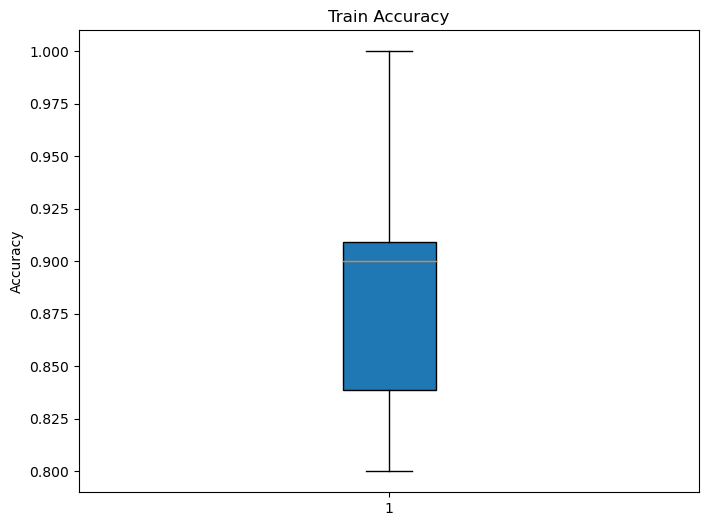

In [125]:
# Define base estimator (Random Forest)
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
cv_train_scores2 = cross_val_score(rf_classifier2, X2_train, y2_train, cv=10)
# 绘制箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(cv_train_scores, patch_artist=True)
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [112]:
#找模型最优超参数
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [10,100,1000,10000]
}

# Cross-Validation
grid_search = GridSearchCV(rf_classifier2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X2_train, y2_train)

# Best Parameters and Best Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

C:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_estimators': 100}
Best Score: 0.8666666666666666


In [128]:
#找到最优参数后计算模型性能
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier2.fit(X2_train, y2_train)
y2_test_pred_rf = rf_classifier2.predict(X2_test)
accuracy_test_rf2 = accuracy_score(y2_test, y2_test_pred_rf)
print("Accuracy_test_rf:", accuracy_test_rf2)

Accuracy_test_rf: 0.8888888888888888


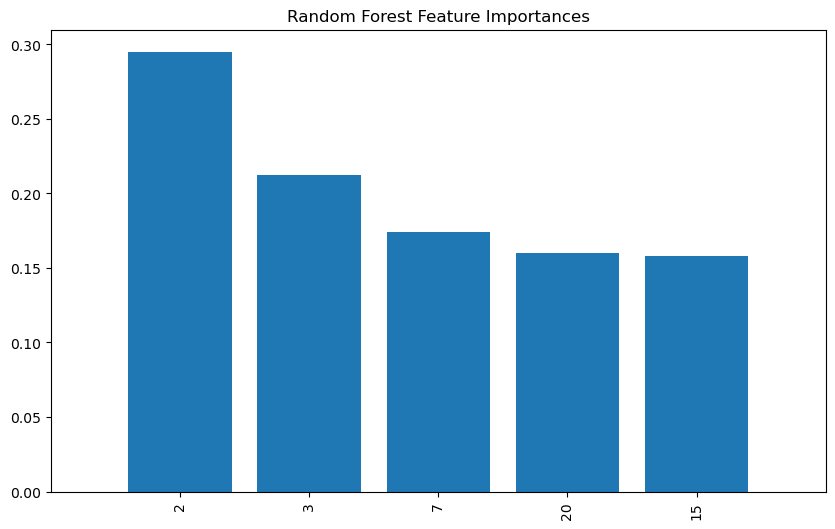

In [130]:
def plot_feature_importances(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} Feature Importances")
    plt.bar(range(X2_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X2_train.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X2_train.shape[1]])
    plt.show()

# 绘制特征重要性图
plot_feature_importances(rf_classifier2, X2.columns, "Random Forest")